In [23]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram


def add_integers(n):

    qc=QuantumCircuit(2*n+n+1)

    #testing initialization for 2 bits numbers
    qc.initialize([0,1],0)
    qc.initialize([0,1],1)
    qc.initialize([0,1],2)
    qc.initialize([0,1],3)



####creating the adder circuit
    a=list(range(n))
    b=list(range(n))
    b=[j + n for j in b]
    sum_reg=list(range(n+1))
    sum_reg=[j+2*n for j in sum_reg]

    # Add integer addition circuit
    for i in range(n):
        qc.toffoli(a[i], b[i],sum_reg[i+1] )
        qc.cnot(a[i], b[i])
        qc.toffoli(b[i], sum_reg[i],sum_reg[i+1] )
        qc.cnot(b[i], sum_reg[i])
    
# # Measure the result
    qc.measure_all()

    return qc

# Set the number of bits for the integers
n = 2
circuit=add_integers(n)
# Draw the circuit
circuit.draw()




░ ┌─┐                  
   q_0: ──■─────────■────────────────────────────░─┤M├──────────────────
          │         │                            ░ └╥┘┌─┐               
   q_1: ──┼────■────┼────■───────────────────────░──╫─┤M├───────────────
          │    │  ┌─┴─┐  │                       ░  ║ └╥┘┌─┐            
   q_2: ──■────┼──┤ X ├──┼────■────■─────────────░──╫──╫─┤M├────────────
          │    │  └───┘┌─┴─┐  │    │             ░  ║  ║ └╥┘┌─┐         
   q_3: ──┼────■───────┤ X ├──┼────┼────■────■───░──╫──╫──╫─┤M├─────────
          │    │       └───┘  │  ┌─┴─┐  │    │   ░  ║  ║  ║ └╥┘┌─┐      
   q_4: ──┼────┼──────────────■──┤ X ├──┼────┼───░──╫──╫──╫──╫─┤M├──────
        ┌─┴─┐  │            ┌─┴─┐└───┘  │  ┌─┴─┐ ░  ║  ║  ║  ║ └╥┘┌─┐   
   q_5: ┤ X ├──┼────────────┤ X ├───────■──┤ X ├─░──╫──╫──╫──╫──╫─┤M├───
        └───┘┌─┴─┐          └───┘     ┌─┴─┐└───┘ ░  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_6: ─────┤ X ├────────────────────┤ X ├──────░──╫──╫──╫──╫──╫──╫─┤M├
             └───┘                    └───┘      ░  ║  ║  ║  ║  ║  ║ └╥┘
meas: 7/════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                                    0  1  2  3  4  5  6

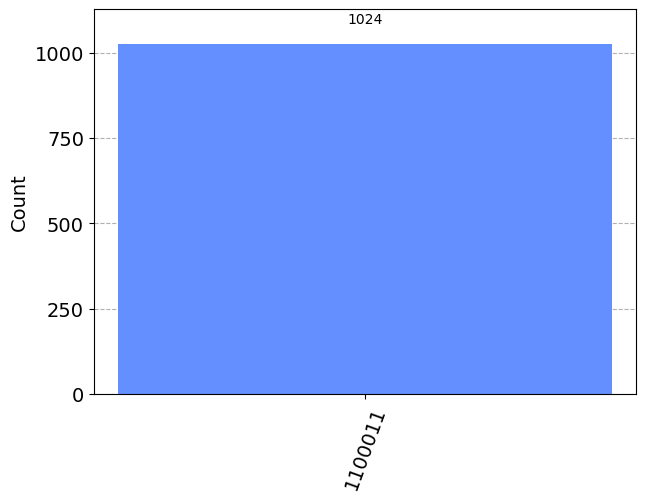

In [22]:
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
# Simulate the circuit

sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circuit).result()
plot_histogram(result_ideal.get_counts(0))

so, the first three bits are the output, the last four are the inputs, where the first is a and the seccond is be for a+b = output. note that this is for two bit addition. thank you!